<a href="https://colab.research.google.com/github/Faliirham/PCVK25_3F_11/blob/main/Week5_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***D. PRAKTIKUM PERTEMUAN 3***

**Fali Irham Maulana / 2341720121**

**TI 3F**

---



# ***D-1 PERCOBAAN HISTOGRAM***

In [ ]:
#Load Library
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

In [ ]:
#Membuat histogram citra

img = cv.imread('/content/drive/MyDrive/PCVK25_3F_11/Gambar/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0,height):
  for x in range(0,width):
    red[img[y,x,0]] += 1
    green[img[y,x,1]] += 1
    blue[img[y,x,2]] += 1

names = np.arange(256)
fig, axis = plt.subplots(1, 3, figsize=(20,5), sharex = True, sharey = True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axis[0].bar(names, red, color = 'red')
axis[1].bar(names, green, color = 'green')
axis[2].bar(names, blue, color = 'blue')




---


# ***PERTANYAAN PRAKTIKUM D1***

1. **Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?**


In [ ]:
#1 Membuat histogram dengan NumPy

# Histogram dengan numpy
red_hist, bins = np.histogram(img[:,:,0], bins=256, range=(0,256))
green_hist, _  = np.histogram(img[:,:,1], bins=256, range=(0,256))
blue_hist, _   = np.histogram(img[:,:,2], bins=256, range=(0,256))

# Plot hasil
fig, axis = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)
fig.suptitle('Histogram RGB dengan NumPy')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axis[0].bar(bins[:-1], red_hist, color='red')
axis[1].bar(bins[:-1], green_hist, color='green')
axis[2].bar(bins[:-1], blue_hist, color='blue')

plt.show()

**Hasilnya Menunjukkan output yang sama namun dengan versi yang lebih ringkas**

2. **Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
gelap, terang, atau kontras rendah.**

In [ ]:
ktm = cv.imread('/content/drive/MyDrive/PCVK25_3F_11/Gambar/KTM lama.jpg')

# Hitung histogram
hist, bins = np.histogram(ktm, bins=256, range=(0,256))

# Plot histogram
plt.figure(figsize=(10,5))
plt.title('Histogram Grayscale - KTM lama.jpg')
plt.xlabel('Intensitas (0=gelap, 255=terang)')
plt.ylabel('Jumlah Pixel')
plt.bar(bins[:-1], hist, color='gray')
plt.show()

**Dari hasil histogram diatas menunjukkan bahwa histogram pada ktm menunjukkan bahwa intensitas gambarnya adalah terang dimana ditunjukkan dengan penumpukan pada sebelah kanan**

# ***D-2 PERCOBAAN HISTOGRAM EQUALIZATION***

1. **Membuat histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart**

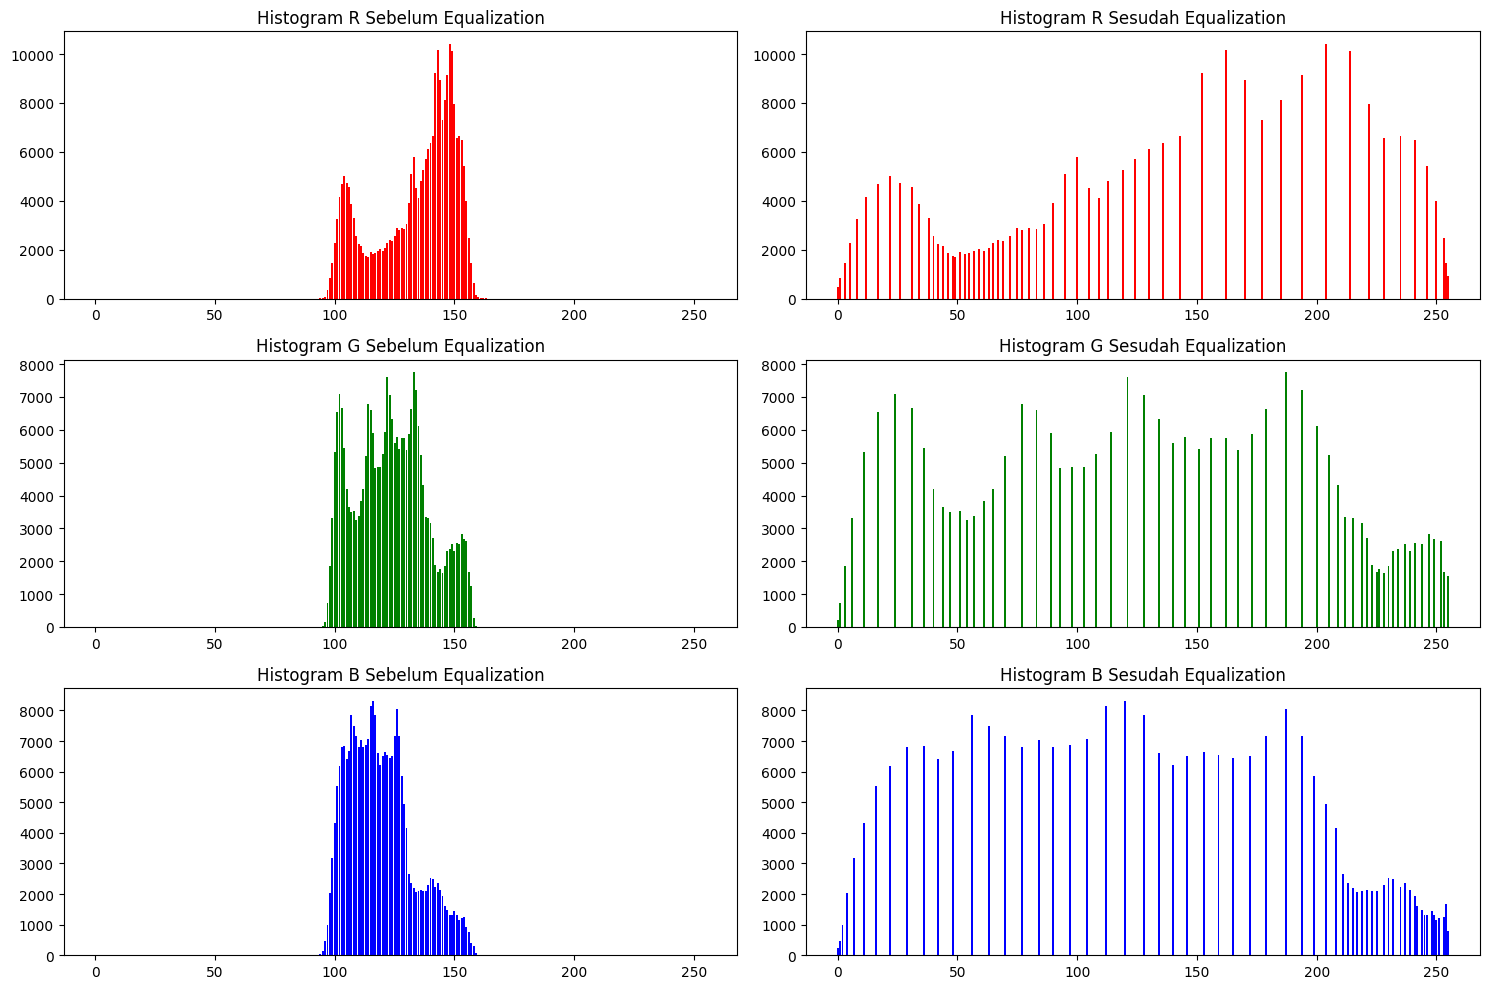

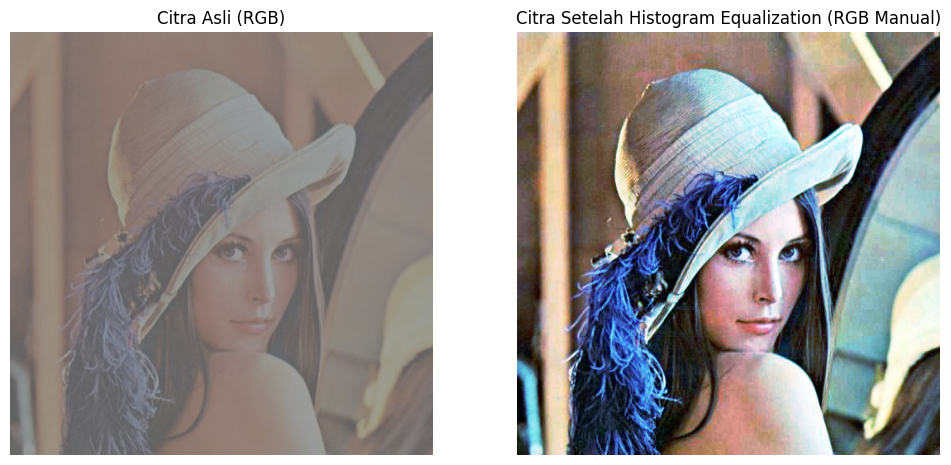

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 1. Input image (RGB)
image = cv.imread('/content/drive/MyDrive/PCVK25_3F_11/Gambar/lena_lc.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Pisahkan channel R, G, B
r, g, b = cv.split(image)

# === PROSES CHANNEL R ===
hist_r = [0] * 256
h, w = r.shape
for y in range(h):
    for x in range(w):
        hist_r[r[y, x]] += 1

cdf_r = [0] * 256
cdf_r[0] = hist_r[0]
for i in range(1, 256):
    cdf_r[i] = cdf_r[i-1] + hist_r[i]

total_pixels = h * w
cdf_r_norm = [c/total_pixels for c in cdf_r]
map_r = [round(val*255) for val in cdf_r_norm]

r_eq = np.zeros_like(r)
for y in range(h):
    for x in range(w):
        r_eq[y, x] = map_r[r[y, x]]

hist_r_eq = [0]*256
for y in range(h):
    for x in range(w):
        hist_r_eq[r_eq[y,x]] += 1

# === PROSES CHANNEL G ===
hist_g = [0] * 256
h, w = g.shape
for y in range(h):
    for x in range(w):
        hist_g[g[y, x]] += 1

cdf_g = [0] * 256
cdf_g[0] = hist_g[0]
for i in range(1, 256):
    cdf_g[i] = cdf_g[i-1] + hist_g[i]

cdf_g_norm = [c/total_pixels for c in cdf_g]
map_g = [round(val*255) for val in cdf_g_norm]

g_eq = np.zeros_like(g)
for y in range(h):
    for x in range(w):
        g_eq[y, x] = map_g[g[y, x]]

hist_g_eq = [0]*256
for y in range(h):
    for x in range(w):
        hist_g_eq[g_eq[y,x]] += 1

# === PROSES CHANNEL B ===
hist_b = [0] * 256
h, w = b.shape
for y in range(h):
    for x in range(w):
        hist_b[b[y, x]] += 1

cdf_b = [0] * 256
cdf_b[0] = hist_b[0]
for i in range(1, 256):
    cdf_b[i] = cdf_b[i-1] + hist_b[i]

cdf_b_norm = [c/total_pixels for c in cdf_b]
map_b = [round(val*255) for val in cdf_b_norm]

b_eq = np.zeros_like(b)
for y in range(h):
    for x in range(w):
        b_eq[y, x] = map_b[b[y, x]]

hist_b_eq = [0]*256
for y in range(h):
    for x in range(w):
        hist_b_eq[b_eq[y,x]] += 1

equalized = cv.merge((r_eq, g_eq, b_eq))

# Visualisasi

fig, axs = plt.subplots(3, 2, figsize=(15,10))

# Histogram R
axs[0,0].bar(range(256), hist_r, color='red')
axs[0,0].set_title("Histogram R Sebelum Equalization")
axs[0,1].bar(range(256), hist_r_eq, color='red')
axs[0,1].set_title("Histogram R Sesudah Equalization")

# Histogram G
axs[1,0].bar(range(256), hist_g, color='green')
axs[1,0].set_title("Histogram G Sebelum Equalization")
axs[1,1].bar(range(256), hist_g_eq, color='green')
axs[1,1].set_title("Histogram G Sesudah Equalization")

# Histogram B
axs[2,0].bar(range(256), hist_b, color='blue')
axs[2,0].set_title("Histogram B Sebelum Equalization")
axs[2,1].bar(range(256), hist_b_eq, color='blue')
axs[2,1].set_title("Histogram B Sesudah Equalization")

plt.tight_layout()
plt.show()

# Tampilkan citra asli vs equalized
fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[0].imshow(image)
axs[0].set_title("Citra Asli (RGB)")
axs[0].axis("off")

axs[1].imshow(equalized)
axs[1].set_title("Citra Setelah Histogram Equalization (RGB Manual)")
axs[1].axis("off")

plt.show()

2. **Membut histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2**

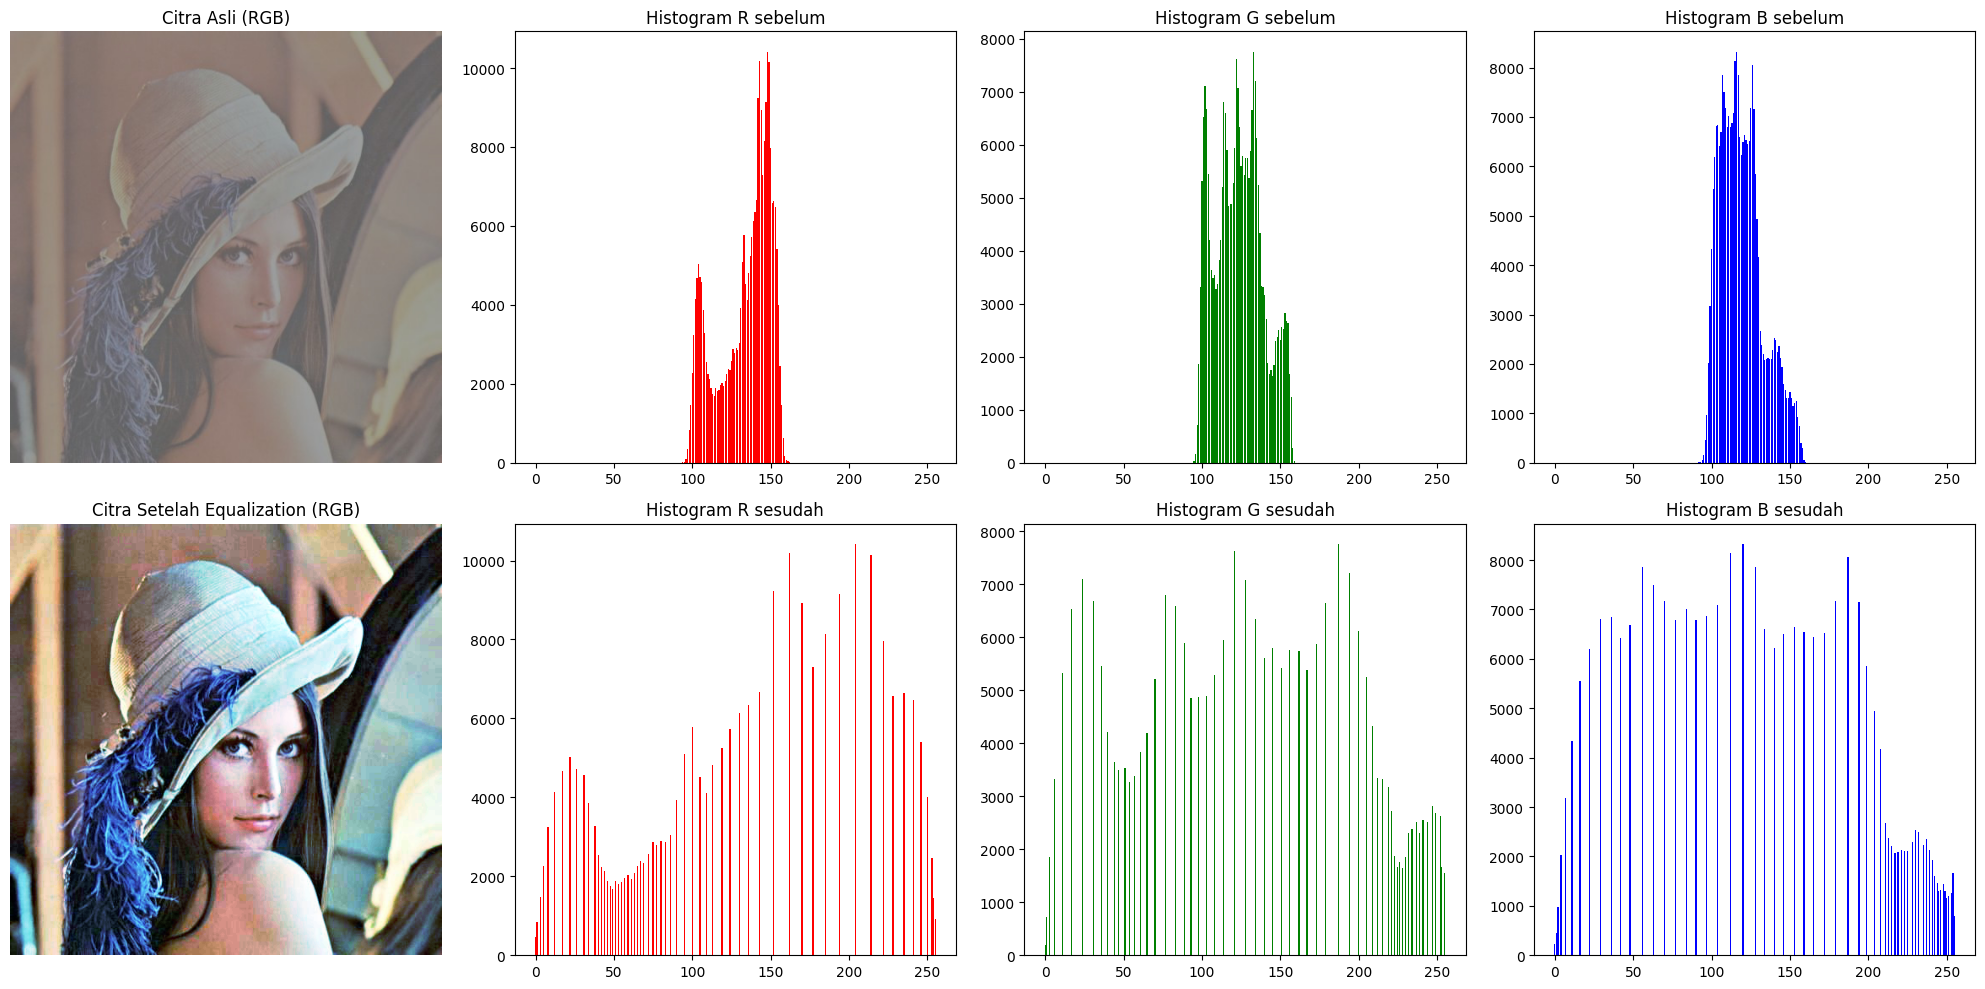

In [ ]:
# Memproses citra dengan menggunakan proses histogram equalization
image = cv.imread('/content/drive/MyDrive/PCVK25_3F_11/Gambar/lena_lc.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Pisahkan channel
r, g, b = cv.split(image)

# Equalization per channel
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

# Gabungkan kembali
equalized = cv.merge((r_eq, g_eq, b_eq))

# Histogram sebelum
hist_r, bins = np.histogram(r, bins=256, range=(0,256))
hist_g, _ = np.histogram(g, bins=256, range=(0,256))
hist_b, _ = np.histogram(b, bins=256, range=(0,256))

# Histogram sesudah
hist_r_eq, _ = np.histogram(r_eq, bins=256, range=(0,256))
hist_g_eq, _ = np.histogram(g_eq, bins=256, range=(0,256))
hist_b_eq, _ = np.histogram(b_eq, bins=256, range=(0,256))

# Plot hasil
fig, axs = plt.subplots(2, 4, figsize=(20,10))

# Gambar asli
axs[0,0].imshow(image)
axs[0,0].set_title("Citra Asli (RGB)")
axs[0,0].axis("off")

# Histogram asli
axs[0,1].bar(bins[:-1], hist_r, color='red')
axs[0,1].set_title("Histogram R sebelum")
axs[0,2].bar(bins[:-1], hist_g, color='green')
axs[0,2].set_title("Histogram G sebelum")
axs[0,3].bar(bins[:-1], hist_b, color='blue')
axs[0,3].set_title("Histogram B sebelum")

# Gambar hasil equalization
axs[1,0].imshow(equalized)
axs[1,0].set_title("Citra Setelah Equalization (RGB)")
axs[1,0].axis("off")

# Histogram hasil equalization
axs[1,1].bar(bins[:-1], hist_r_eq, color='red')
axs[1,1].set_title("Histogram R sesudah")
axs[1,2].bar(bins[:-1], hist_g_eq, color='green')
axs[1,2].set_title("Histogram G sesudah")
axs[1,3].bar(bins[:-1], hist_b_eq, color='blue')
axs[1,3].set_title("Histogram B sesudah")

plt.tight_layout()
plt.show()

# ***PERTANYAAN PRAKTIKUM D2***

1. **Perbandingan Citra Lena**

   a. Gunakan hasil histogram equalization pada citra lena.jpg.

   b. Hitung nilai PSNR antara citra asli dan citra hasil equalization.

   c. Apakah nilai PSNR tinggi atau rendah? Apa arti nilai tersebut terhadap kualitas visual citra? Apakah ada detail baru yang muncul setelah equalization?

In [ ]:
#Jawaban

#A & B Mengambil Nilai Eqwalization dan Menghitung nilai PSNR

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 10 * np.log10((PIXEL_MAX ** 2) / mse)

psnr_value = psnr(image, equalized)
print("PSNR Lena:", psnr_value)



PSNR Lena: 27.767724564120996


  ***Jawaban c:*** Nilai PSNR sebesar 27,76 dB tergolong menengah ke bawah, jadi citra hasil equalization memang berbeda cukup jauh dari citra aslinya. Walaupun secara angka kualitas kesetiaannya menurun, hal ini wajar karena histogram equalization mengubah distribusi intensitas piksel secara drastis. Secara visual justru terlihat bahwa kontras citra meningkat dan beberapa detail yang sebelumnya samar di area gelap maupun terang jadi lebih jelas, meskipun kesannya ada bagian tertentu yang jadi terlalu kontras dibandingkan citra awal.

2. Gunakan Citra KTM Lama.jpg

    a. Terapkan histogram equalization pada citra KTM lama.jpg.

    b. Tampilkan citra asli, citra hasil equalization, serta histogram keduanya
    dalam satu layout.

    c. Bandingkan citra KTM lama.jpg sebelum dan sesudah histogram equalization.
    Jelaskan perbedaan yang terlihat secara visual (misalnya pada detail wajah,
    teks, atau latar belakang). Apakah perubahan tersebut meningkatkan kualitas
    informasi dari citra atau justru membuat citra terlihat terlalu “keras”.

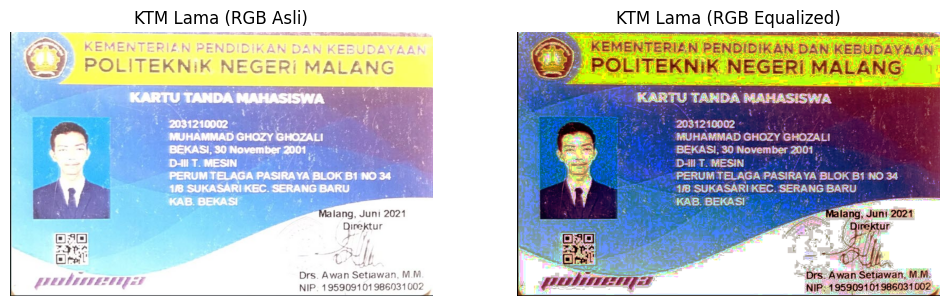

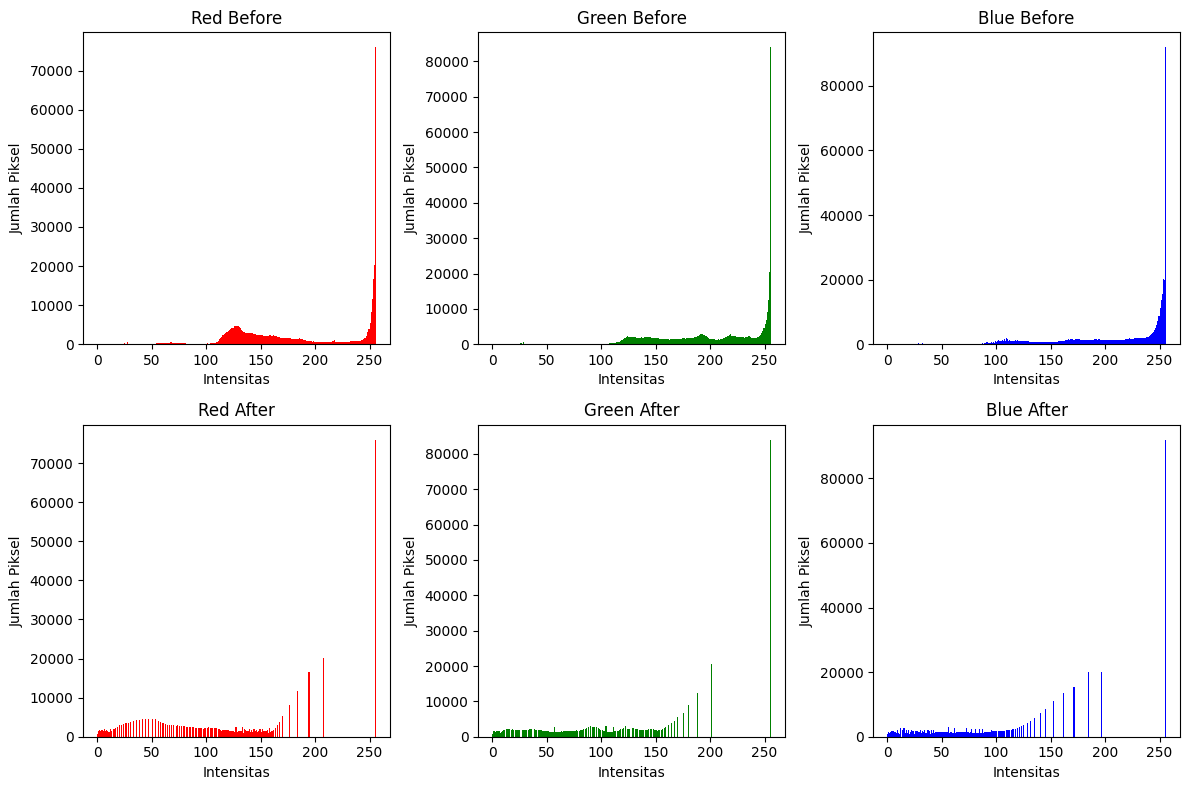

In [ ]:
#Jawaban

import cv2 as cv
import matplotlib.pyplot as plt

# Baca citra KTM Lama dalam format RGB
ktm_rgb = cv.imread("/content/drive/MyDrive/PCVK25_3F_11/Gambar/KTM lama.jpg")
ktm_rgb = cv.cvtColor(ktm_rgb, cv.COLOR_BGR2RGB)

# Pisahkan channel R, G, B
r, g, b = cv.split(ktm_rgb)

# Equalization per channel
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

# Gabungkan kembali channel hasil equalization
ktm_eq_rgb = cv.merge((r_eq, g_eq, b_eq))

# Tampilkan citra sebelum & sesudah
plt.figure(figsize=(12,6))
plt.subplot(1,2,1), plt.imshow(ktm_rgb)
plt.title("KTM Lama (RGB Asli)"), plt.axis("off")
plt.subplot(1,2,2), plt.imshow(ktm_eq_rgb)
plt.title("KTM Lama (RGB Equalized)"), plt.axis("off")
plt.show()

# Histogram RGB Before vs After (dipisah per channel)
colors = ('red','green','blue')
channels_before = (r,g,b)
channels_after = (r_eq,g_eq,b_eq)

plt.figure(figsize=(12,8))

# Before
for i, (ch, color) in enumerate(zip(channels_before, colors)):
    plt.subplot(2,3,i+1)
    plt.hist(ch.ravel(), bins=256, range=(0,256), color=color)
    plt.title(f"{color.capitalize()} Sebelum Equalized")
    plt.xlabel("Intensitas"), plt.ylabel("Jumlah Piksel")

# After
for i, (ch, color) in enumerate(zip(channels_after, colors)):
    plt.subplot(2,3,i+4)
    plt.hist(ch.ravel(), bins=256, range=(0,256), color=color)
    plt.title(f"{color.capitalize()} Setelah Equalized")
    plt.xlabel("Intensitas"), plt.ylabel("Jumlah Piksel")

plt.tight_layout()
plt.show()

***Penjelasan:***  
pada citra KTM Lama yang asli warnanya memang terlihat lebih natural dan lembut, walaupun ada bagian yang agak pudar atau kurang kontras, seperti detail wajah, teks putih di atas latar biru, dan beberapa bagian background. Setelah saya lakukan histogram equalization, hasilnya jadi jauh lebih kontras: detail wajah terlihat lebih jelas, teks yang tadinya agak samar jadi lebih tajam, dan pola di latar belakang juga lebih kelihatan. Tapi di sisi lain, perubahan ini membuat warnanya terasa lebih keras dan kurang natural, misalnya kulit wajah jadi lebih gelap, warna kuning dan biru tampak terlalu pekat, bahkan muncul kesan bintik atau noise. Jadi bisa dibilang informasi tertentu memang lebih mudah terbaca, tapi kualitas visual secara keseluruhan jadi kurang seimbang karena warnanya tidak realistis lagi.

# ***D-3 TUGAS PRAKTIKUM DITHERING***

1. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

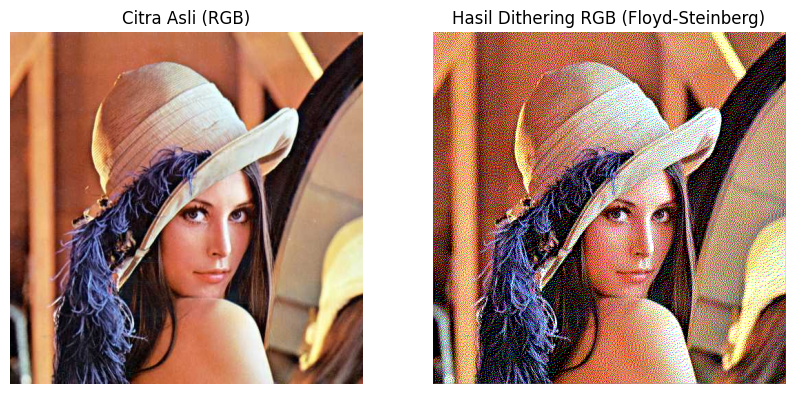

In [8]:
# Fungsi Floyd-Steinberg Dithering
def floyd_steinberg_dithering_channel(channel):
    h, w = channel.shape
    out = channel.copy().astype(np.float32)

    for y in range(h - 1):
        for x in range(1, w - 1):
            old_pixel = out[y, x]
            new_pixel = 255 if old_pixel > 127 else 0
            out[y, x] = new_pixel
            error = old_pixel - new_pixel

            out[y, x+1]   += error * 7/16
            out[y+1, x-1] += error * 3/16
            out[y+1, x]   += error * 5/16
            out[y+1, x+1] += error * 1/16

    out = np.clip(out, 0, 255)
    return out.astype(np.uint8)

# Baca citra dalam format RGB
img_rgb = cv.imread("/content/drive/MyDrive/PCVK25_3F_11/Gambar/lena.jpg")
img_rgb = cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB)

# Pisahkan channel R, G, B
r, g, b = cv.split(img_rgb)

# Terapkan dithering ke masing-masing channel
r_dither = floyd_steinberg_dithering_channel(r)
g_dither = floyd_steinberg_dithering_channel(g)
b_dither = floyd_steinberg_dithering_channel(b)

# Gabungkan kembali hasilnya
dither_rgb = cv.merge((r_dither, g_dither, b_dither))

# Tampilkan hasil
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Citra Asli (RGB)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(dither_rgb)
plt.title("Hasil Dithering RGB (Floyd-Steinberg)")
plt.axis("off")
plt.show()

2. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

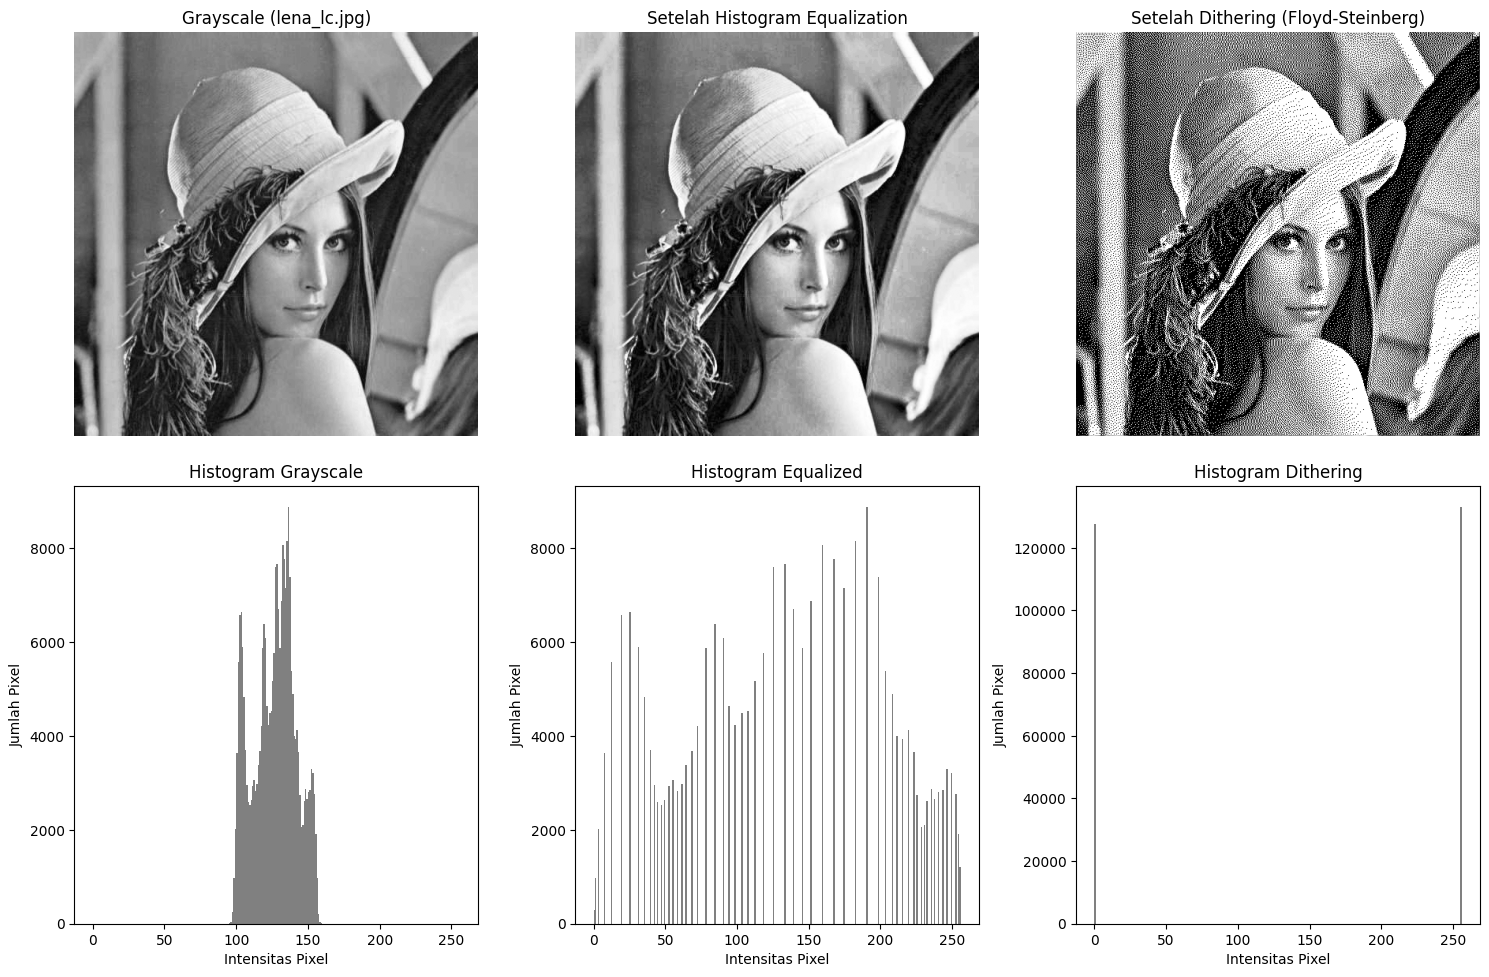

In [15]:
def floyd_steinberg_dithering(img):
    h, w = img.shape
    out = img.copy().astype(np.float32)
    for y in range(h - 1):
        for x in range(1, w - 1):
            old_pixel = out[y, x]
            new_pixel = 255 if old_pixel > 127 else 0
            out[y, x] = new_pixel
            error = old_pixel - new_pixel
            out[y, x+1]   += error * 7/16
            out[y+1, x-1] += error * 3/16
            out[y+1, x]   += error * 5/16
            out[y+1, x+1] += error * 1/16
    out = np.clip(out, 0, 255)
    return out.astype(np.uint8)

img_lc = cv.imread("/content/drive/MyDrive/PCVK25_3F_11/Gambar/lena_lc.jpg")
gray = cv.cvtColor(img_lc, cv.COLOR_BGR2GRAY)
equalized = cv.equalizeHist(gray)
dithered = floyd_steinberg_dithering(equalized)

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale (lena_lc.jpg)")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(equalized, cmap="gray")
plt.title("Setelah Histogram Equalization")
plt.axis("off")


plt.subplot(2,3,3)
plt.imshow(dithered, cmap="gray")
plt.title("Setelah Dithering (Floyd-Steinberg)")
plt.axis("off")

plt.subplot(2,3,4)
plt.hist(gray.ravel(), bins=256, range=(0,256), color="grey")
plt.title("Histogram Grayscale")
plt.xlabel("Intensitas Pixel")
plt.ylabel("Jumlah Pixel")

plt.subplot(2,3,5)
plt.hist(equalized.ravel(), bins=256, range=(0,256), color="grey")
plt.title("Histogram Equalized")
plt.xlabel("Intensitas Pixel")
plt.ylabel("Jumlah Pixel")

plt.subplot(2,3,6)
plt.hist(dithered.ravel(), bins=256, range=(0,256), color="grey")
plt.title("Histogram Dithering")
plt.xlabel("Intensitas Pixel")
plt.ylabel("Jumlah Pixel")

plt.tight_layout()
plt.show()